In [2]:
#on importe la bibliothèque torch qui est utilisée pour le développement de réseaux de neurones
import torch
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
#on génère les données en forme de cercle en définissant le nombre d'échantillons à 1000 et le bruit à 0.03
X, y = datasets.make_circles(n_samples=1000, noise=0.03,random_state=42)

In [4]:
#affichage des dimensions du dataset
print("Dimension d'entrée (X):", X.shape)
#cela signifie que X contient 1000 échantillons avec 2 caractéristiques chacun

Dimension d'entrée (X): (1000, 2)


In [5]:
print("Dimension de sortie (y):", y.shape)
#cela signifie que y contient 1000 étiquettes de classe.

Dimension de sortie (y): (1000,)


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

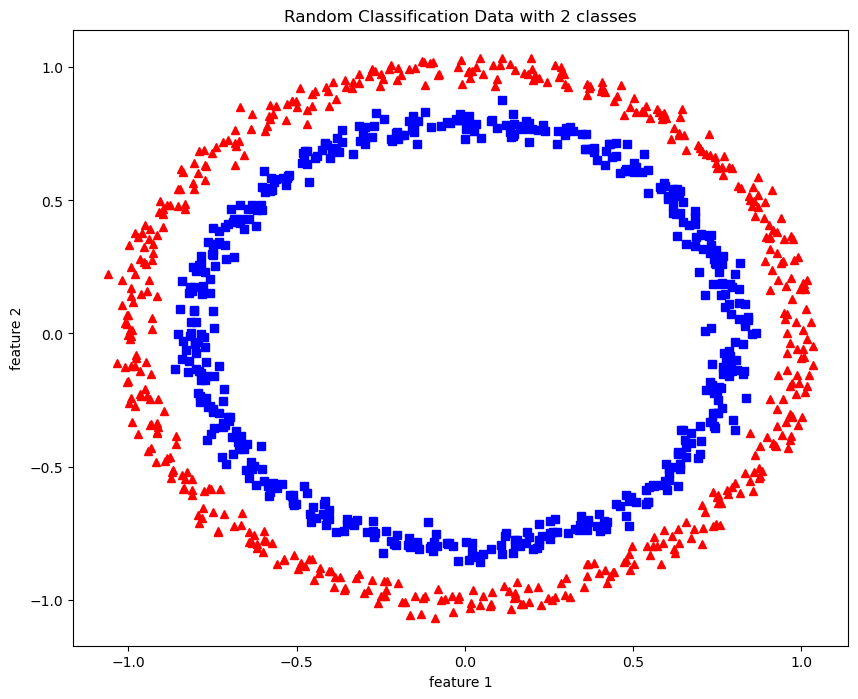

In [6]:
#on visualise les données 
fig = plt.figure(figsize=(10,8)) #la figure taille de 10 pouces de large et 8 de haut
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^') #tracage des points appartenant à la classe 0 (y=0) avec des triangles en rouge 
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')#tracage des points appartenant à la classe 1 (y=1) avec des triangles en bleu
plt.xlabel("feature 1")  #le label de l'axe x 
plt.ylabel("feature 2")  #le label de l'axe y
plt.title('Random Classification Data with 2 classes')

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

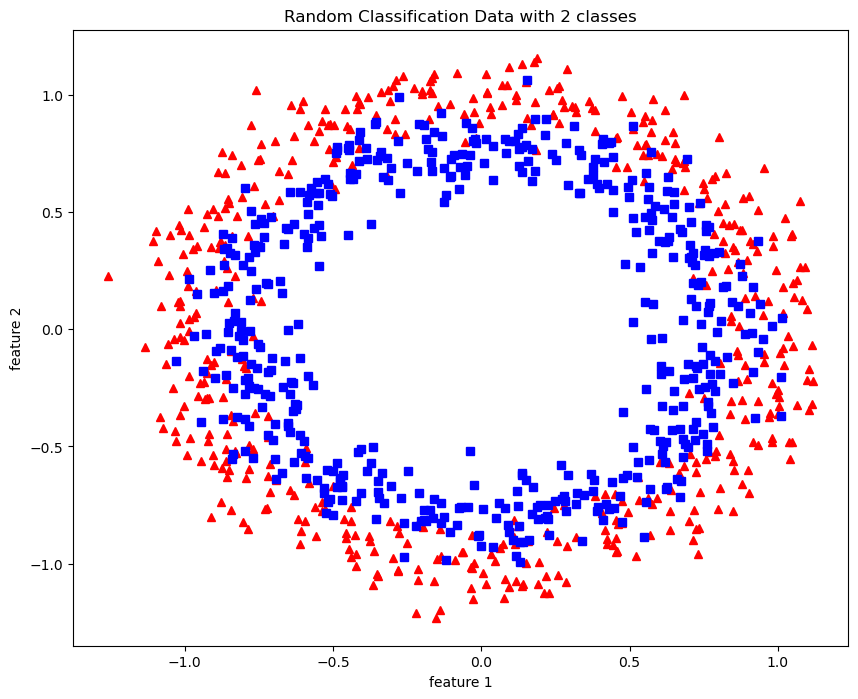

In [7]:
from sklearn import datasets
#on change la valeur du bruit qui devient égale à 0.1 (on l'a augmenté)
X1, y1 = datasets.make_circles(n_samples=1000, noise=0.1,random_state=42)
fig = plt.figure(figsize=(10,8))
plt.plot(X1[:, 0][y1 == 0], X1[:, 1][y1 == 0], 'r^')
plt.plot(X1[:, 0][y1 == 1], X1[:, 1][y1 == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
#Cela a entraîné un chevauchement des cercles générés et a rendu les données plus difficiles à séparer en classes distinctes
#Pour séparer ces classes on aura besoin d'une fonction non linéaire bien évidemment

In [8]:
print(X[:5]) # Affiche les cinq premières lignes du tableau X
print(y[:5]) # Affiche les cinq premières lignes du tableau y

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [9]:
#on transforme les tableaux NumPy en des tenseurs PyTorch pour pouvoir utiliser les fonctionnalités de PyTorch pour 
#l'apprentissage en profondeur:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np


# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les tailles des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement : ", len(X_train))
print("Taille de l'ensemble de test : ", len(X_test))
print(y_test)

Taille de l'ensemble d'entraînement :  800
Taille de l'ensemble de test :  200
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])


In [11]:
from torch import nn #nn  est utilisé pour la création de réseaux de neurones
device = "cuda" if torch.cuda.is_available() else "cpu"
#Si un GPU est disponible, la variable device est configurée pour utiliser cuda, sinon elle est configurée pour utiliser cpu

In [12]:
#creation de la classe ModelV0
class ModelV0 (nn.Module):
    def __init__(self):
        super().__init__()
    # Constructeur pour definir l’ architecture du modele
        self.layer_1 = nn.Linear(in_features =2, out_features =5)
        self.layer_2 = nn.Linear(in_features =5, out_features =1)
    # Propagation des donnees dans le modele
    def forward(self,x):
        return self.layer_2(self.layer_1(x))

In [13]:
#instanciation de la classe
model_0 = ModelV0().to(device)

In [14]:
#affichage des couches du modèle
print(model_0)

ModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


In [15]:
#definition de la fonction de perte
loss_fn=nn.BCEWithLogitsLoss()
#definition de l'optimiseur
optimizer=torch.optim.SGD(params =model_0.parameters(),lr=0.1)

In [16]:
#fonction de calcul de l'exactitude de la classification
def accuracy_fn(y_true,y_pred):
    c = torch.eq(y_true,y_pred).sum().item()
    accuracy = c/len(y_true)
    return accuracy

In [19]:
torch.manual_seed (42)
#definition du nombre d'époques =100
epochs = 100
# Envoyer le dataset a l appareil d execution
X_train , y_train = X_train.to(device),y_train.to(device)
X_test , y_test = X_test.to(device),y_test.to(device)
#boucle d'entrainement sur le nombre d'époques spécifié
for epoch in range ( epochs ):
    #activation du mode d'entrainement du modèle
    model_0.train()
    #calcul des sorties du modèle pour les données d'entrainement
    y_logits= model_0 ( X_train ).squeeze()
    #prediction binaires grace a la fonction sigmoide 
    y_pred= torch.round (torch.sigmoid (y_logits))
    #Calcul de la fonction de perte entre les prédictions du modèle et les vraies étiquettes d'entraînement
    loss=loss_fn(y_logits,y_train )
    #Calcul de la précision du modèle sur les données d'entraînement
    acc= accuracy_fn(y_true= y_train, y_pred=y_pred)
    #Réinitialisation des gradients des paramètres du modèle
    optimizer.zero_grad()
    #Calcul des gradients de la fonction de perte
    loss.backward()
    #Mise à jour des paramètres du modèle 
    optimizer.step()
    #Activation du mode d'évaluation du modèle
    model_0.eval()
    # amélioration des performances d'inférence du modèle lors de l'évaluation
    with torch.inference_mode() :
        #Calcul des logits du modèle pour les données de test
        test_logits= model_0(X_test).squeeze()
        #Application de la fonction d'activation sigmoïde pour obtenir les prédictions binaires pour les données de test
        test_pred= torch.round (torch.sigmoid(test_logits))
        #Calcul de la fonction de perte 
        test_loss= loss_fn(test_logits,y_test )
        #Calcul de la précision du modèle sur les données de test
        test_acc= accuracy_fn(y_true=y_test,y_pred=test_pred)
    #Affichage de la progression du modèle toutes les 10 époques
    if epoch % 10 == 0:   
        print("Loss:",loss,"Accuracy:",acc,"Test Loss:",test_loss,"Test accuracy:",test_acc)

Loss: tensor(0.6952, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Accuracy: 0.53875 Test Loss: tensor(0.7010) Test accuracy: 0.475
Loss: tensor(0.6941, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Accuracy: 0.525 Test Loss: tensor(0.6990) Test accuracy: 0.465
Loss: tensor(0.6936, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Accuracy: 0.5175 Test Loss: tensor(0.6979) Test accuracy: 0.46
Loss: tensor(0.6934, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Accuracy: 0.51 Test Loss: tensor(0.6972) Test accuracy: 0.47
Loss: tensor(0.6933, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Accuracy: 0.51125 Test Loss: tensor(0.6966) Test accuracy: 0.475
Loss: tensor(0.6932, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Accuracy: 0.5125 Test Loss: tensor(0.6963) Test accuracy: 0.47
Loss: tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) Accuracy: 0.51375 Test Loss: tensor(0.6960) Test accuracy: 0.47
Loss: tensor(0.6931, grad_fn=<BinaryCrossEntropyWithLogitsBackward

In [38]:
from sklearn.model_selection import KFold

#les données d'entraînement seront divisées en 5 plis cad 5 parties égales
n_splits = 5

# Créer une instance de KFold
kf = KFold(n_splits=n_splits)

# Initialiser une liste pour stocker les scores de chaque pli
scores = []

# Boucle sur les plis, on va entrainer le modèle sur chaque pli puis évaluer sa performance moyenne
for train_index, val_index in kf.split(X_train):
    # Diviser les données d'entraînement en ensembles d'entraînement et de validation
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Entraîner le modèle sur l'ensemble d'entraînement
    for epoch in range(epochs):
        # Remettre à zéro les gradients
        optimizer.zero_grad()
        
        # Propagation avant
        outputs = model_0(X_train_fold)
        
        # Calcul de la fonction de perte
        loss = loss_fn(outputs, y_train_fold.unsqueeze(1))
        
        # Rétropropagation
        loss.backward()
        
        # Mise à jour des poids
        optimizer.step()
    
    # Évaluer la performance du modèle sur l'ensemble de validation
    with torch.no_grad():
        model_0.eval()
        val_outputs = model_0(X_val_fold)
        val_preds = torch.round(torch.sigmoid(val_outputs))
        val_acc = (val_preds == y_val_fold.unsqueeze(1)).sum().item() / len(y_val_fold)
        scores.append(val_acc)

# Calculer la performance moyenne sur tous les plis
mean_score = np.mean(scores)

# Afficher la performance moyenne
print("Performance moyenne : {:.2f}".format(mean_score))

Performance moyenne : 0.47
